<a href="https://colab.research.google.com/github/akhilanil-369/CognoRise-InfoTech/blob/main/Email_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df=pd.read_csv('/content/spam.csv',encoding= 'ISO-8859-1')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
df.isna().sum()

,0
Category,0
Message,0


In [ ]:
df.dtypes

,0
Category,object
Message,object


In [ ]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


<Axes: xlabel='Category', ylabel='count'>

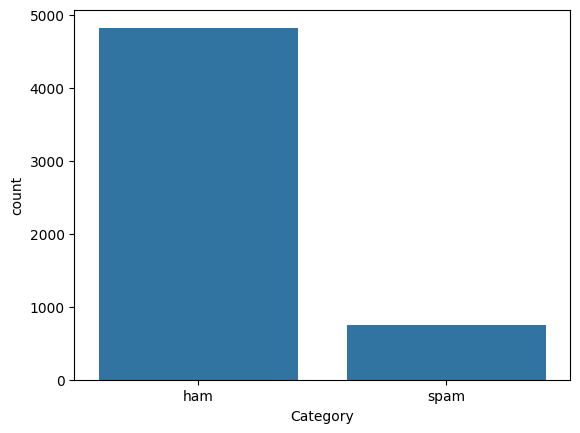

In [ ]:
sns.countplot(x=df['Category'],data=df)

In [ ]:
#spam===>0
#haam===>1
df['Category']=df['Category'].map({'ham':1,'spam':0})
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ã¼ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [ ]:
msg=df.Message
msg

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ã¼ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
msg=msg.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
msg

,Message
0,"Go until jurong point , crazy .. Available onl..."
1,Ok lar ... Joking wif u oni ...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor ... U c already then sa...
4,"Nah I don't think he goes to usf , he lives ar..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ã ¼ b going to esplanade fr home ?
5569,"Pity , * was in mood for that . So ... any oth..."
5570,The guy did some bitching but I acted like i'd...


In [ ]:
msg=msg.str.replace('[^a-zA-Z0-9]+',' ')
msg

,Message
0,"Go until jurong point , crazy .. Available onl..."
1,Ok lar ... Joking wif u oni ...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor ... U c already then sa...
4,"Nah I don't think he goes to usf , he lives ar..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ã ¼ b going to esplanade fr home ?
5569,"Pity , * was in mood for that . So ... any oth..."
5570,The guy did some bitching but I acted like i'd...


In [ ]:
from nltk.tokenize import word_tokenize
msg=msg.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
msg

,Message
0,until jurong point crazy Available only bugis ...
1,lar ... Joking wif oni ...
2,Free entry wkly comp win Cup final tkts 21st M...
3,dun say early hor ... already then say ...
4,Nah n't think goes usf lives around here though
...,...
5567,This the 2nd time have tried contact have won ...
5568,Will going esplanade home
5569,Pity was mood for that ... any other suggestions
5570,The guy did some bitching but acted like inter...


In [ ]:
#stemming
from nltk.stem import SnowballStemmer
st=SnowballStemmer('english')
msg=msg.apply(lambda x:[st.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
msg

,Message
0,until jurong point crazi avail onli bugi great...
1,lar ... joke wif oni ...
2,free entri wkli comp win cup final tkts 21st m...
3,dun say earli hor ... alreadi then say ...
4,nah n't think goe usf live around here though
...,...
5567,this the 2nd time have tri contact have won th...
5568,will go esplanad home
5569,piti was mood for that ... ani other suggest
5570,the guy did some bitch but act like interest b...


In [ ]:
#remove stop words
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop=stopwords.words('english')
msg=msg.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
msg

,Message
0,jurong point crazi avail onli bugi great world...
1,lar ... joke wif oni ...
2,free entri wkli comp win cup final tkts 21st m...
3,dun say earli hor ... alreadi say ...
4,nah n't think goe usf live around though
...,...
5567,2nd time tri contact 750 pound prize claim eas...
5568,go esplanad home
5569,piti mood ... ani suggest
5570,guy bitch act like interest buy someth els nex...


In [ ]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(msg)
data

<5572x7112 sparse matrix of type '<class 'numpy.float64'>'
	with 44740 stored elements in Compressed Sparse Row format>

In [ ]:
print(data)

  (0, 6793)	0.20203047130059745
  (0, 1041)	0.3657318424884653
  (0, 3038)	0.16954368353003973
  (0, 1818)	0.3089717384520193
  (0, 1585)	0.34913057628928906
  (0, 6969)	0.24517543868729555
  (0, 3076)	0.20165655308257646
  (0, 1587)	0.3089717384520193
  (0, 4617)	0.17518120543397994
  (0, 1228)	0.2757692060536668
  (0, 2022)	0.28323413617381227
  (0, 4922)	0.249729434431227
  (0, 3649)	0.3657318424884653
  (1, 4615)	0.5892230337773975
  (1, 6892)	0.4625935436300812
  (1, 3618)	0.49506982696691904
  (1, 3783)	0.44014690307313215
  (2, 78)	0.26925934551321457
  (2, 1113)	0.19168304296989988
  (2, 5181)	0.19168304296989988
  (2, 6523)	0.14252905753185302
  (2, 5954)	0.22548435271094622
  (2, 5138)	0.18908621197977196
  (2, 5221)	0.1851828562535381
  (2, 798)	0.253129013723142
  :	:
  (5567, 5044)	0.21170966726633056
  (5567, 4803)	0.22662333966656326
  (5567, 4617)	0.17476566758942588
  (5568, 2550)	0.782681381846728
  (5568, 3000)	0.43953417232463426
  (5568, 3281)	0.4407034897404325
  

In [ ]:
data.shape

(5572, 7112)

In [ ]:
y=df['Category'].values
y

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)
x_train

<3900x7112 sparse matrix of type '<class 'numpy.float64'>'
	with 31494 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
knn=KNeighborsClassifier(n_neighbors=5)
model=LogisticRegression()
rfc=RandomForestClassifier(n_estimators=100, random_state=42)
abc=AdaBoostClassifier(n_estimators=50, random_state=42)
lst=[knn,model,rfc,abc]

In [ ]:
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("Model is",i)
  print("-"*100)
  print(y_pred)
  print("*"*100)
  print("score is",accuracy_score(y_test,y_pred))
  print("*"*100)
  print(confusion_matrix(y_test,y_pred))
  print("*"*100)
  print(classification_report(y_test,y_pred))

Model is KNeighborsClassifier()
----------------------------------------------------------------------------------------------------
[1 1 1 ... 1 1 1]
****************************************************************************************************
score is 0.9013157894736842
****************************************************************************************************
[[  59  165]
 [   0 1448]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      0.26      0.42       224
           1       0.90      1.00      0.95      1448

    accuracy                           0.90      1672
   macro avg       0.95      0.63      0.68      1672
weighted avg       0.91      0.90      0.88      1672

Model is LogisticRegression()
----------------------------------------------------------------------------------------------------
[1 1 1 ... 1 0 1]
***************